In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("/Users/ivanpopov/Downloads/titanic/train.csv")

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
X = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
Y = data.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [31]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [32]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [33]:
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Дерево решений

In [34]:
from sklearn import tree

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

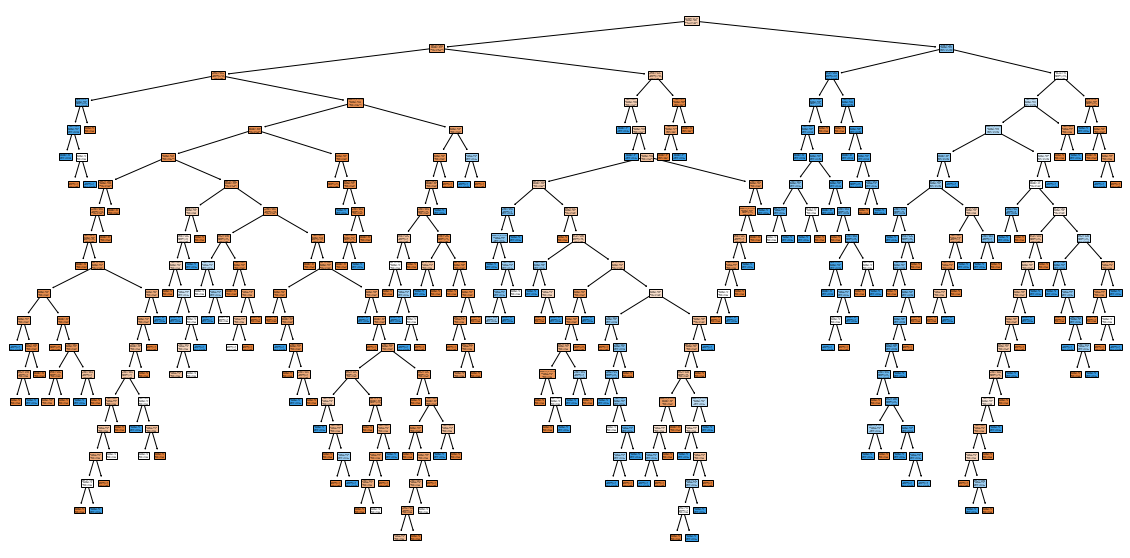

In [36]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=list(X),class_names=['Died', 'Survived'], filled=True)
plt.show()

Модель переобучена, слишком глубокое дерево. Закономерность не выявляется, нам не требуется 100% точность

# Разобьем данные на тренировочные и тестовые, добавим максимальную глубину дерева

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train)
print(f'Точность на тренировочных данных: {clf.score(X_train, Y_train)}\
, точность на тестовых данных:{clf.score(X_test, Y_test)}')

Точность на тренировочных данных: 0.9798657718120806, точность на тестовых данных:0.7728813559322034


In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X_train, Y_train)
print(f'Точность на тренировочных данных: {clf.score(X_train, Y_train)}\
, точность на тестовых данных:{clf.score(X_test, Y_test)}')

Точность на тренировочных данных: 0.8406040268456376, точность на тестовых данных:0.8067796610169492


In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, Y_train)
print(f'Точность на тренировочных данных: {clf.score(X_train, Y_train)}\
, точность на тестовых данных:{clf.score(X_test, Y_test)}')

Точность на тренировочных данных: 0.8238255033557047, точность на тестовых данных:0.8203389830508474


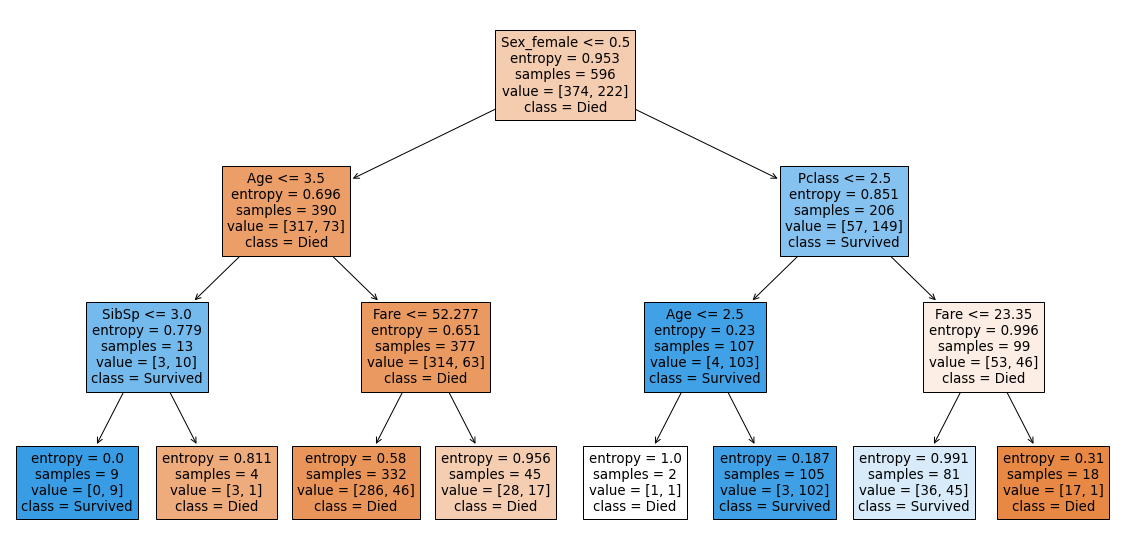

In [41]:
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=list(X),class_names=['Died', 'Survived'], filled=True)
plt.show()

Таким образом, следует учитывать, что нам нужна не абсолютная точность предсказаний, что влечет за собой переобученность модели, а требуется выявить какую-то закономерность в данных

In [42]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [clf.score(X_train, Y_train)],
                                    'test_score': [clf.score(X_test, Y_test)]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [43]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [44]:
import plotly.graph_objs as pgo
fig = pgo.Figure()
fig.add_trace(pgo.Scatter(x=scores_data["max_depth"], y=scores_data["train_score"], mode='lines', name="train_score"))
fig.add_trace(pgo.Scatter(x=scores_data["max_depth"], y=scores_data["test_score"], mode='lines', name="test_score"))
fig.show()

# Введем валидационную выборку данных, чтобы подобрать оптимальные параметы модели

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cross_val_score(clf, X_train, Y_train, cv=5).mean()

0.7886274509803922

In [47]:
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, Y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, Y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [clf.score(X_train, Y_train)],
                                    'test_score': [clf.score(X_test, Y_test)], 
                                   'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data])

In [48]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073


In [49]:
fig = pgo.Figure()
fig.add_trace(pgo.Scatter(x=scores_data["max_depth"], y=scores_data["train_score"], mode='lines', name="train_score"))
fig.add_trace(pgo.Scatter(x=scores_data["max_depth"], y=scores_data["test_score"], mode='lines', name="test_score"))
fig.add_trace(pgo.Scatter(x=scores_data["max_depth"], y=scores_data["cross_val_score"], mode='lines', name="cross_val_score"))
fig.show()

Наилучший показатель оценки достигается при глубине дерева равной 11

In [50]:
best_clf = clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
best_clf.fit(X_train, Y_train)
best_clf.score(X_test, Y_test)

0.7694915254237288

# GridSearch для подбора гиперпараметров модели

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
clf = tree.DecisionTreeClassifier()
parametrs = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 30)}

In [75]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [76]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [77]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [78]:
best_clf.score(X_test, Y_test)

0.7661016949152543

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [80]:
print(f'accuracy: {best_clf.score(X_test, Y_test):.3f}') 
print(f'precision: {precision_score(Y_test, best_clf.predict(X_test)):.3f}') 
print(f'recall: {recall_score(Y_test, best_clf.predict(X_test)):.3f}')
print(f'f1: {f1_score(Y_test, best_clf.predict(X_test)):.3f}')

accuracy: 0.766
precision: 0.793
recall: 0.575
f1: 0.667


In [81]:
y_predicted_prob = best_clf.predict_proba(X_test)
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

In [82]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0])

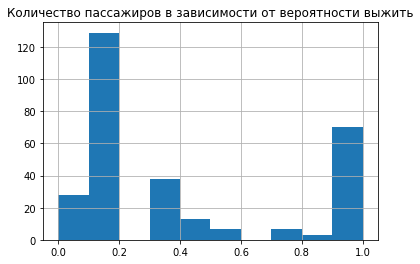

In [85]:
pd.Series(y_predicted_prob[:, 1]).hist()
plt.title("Количество пассажиров в зависимости от вероятности выжить")
plt.show() 

# Построение ROC кривой

In [89]:
from sklearn.metrics import roc_curve, auc

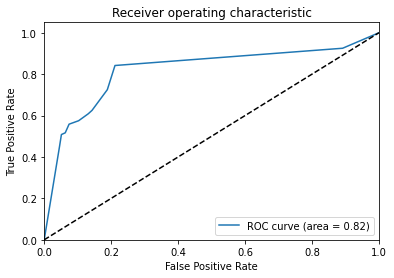

In [94]:
#tpr = recall
fpr, tpr, thresholds = roc_curve(Y_test, y_predicted_prob[:,1])
#площадь под кривой ROC
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [98]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)
recall_score(Y_test, y_pred)

0.5083333333333333

In [99]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.5, 1, 0)
recall_score(Y_test, y_pred)

0.575

In [102]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.2, 1, 0)
recall_score(Y_test, y_pred)

0.8416666666666667

Если мы уменьшаем порог вероятности для причисления человека к выжившим, то у нас увеличивается полнота, так как мы причисляем к числу выживших большее количество людей, что влечет за собой уменьшение показателя FN(false-negative: negative => предсказание = 0, но на самом деле класс является положительным) из-за того, что мы уменьшили число причислений к 0 классу нашей моделью.